In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Data Import
orders = pd.read_csv('List_of_Orders_55FFC79CF8.csv')
order_details = pd.read_csv('Order_Details_19795F61CF.csv')
sales_target = pd.read_csv('Sales_target_DD2E9B96A0.csv')

In [ ]:
# Loop through each dataset, load it, and print the required info
datasets = {
    'List_of_Orders_55FFC79CF8.csv': 'List of Orders',
    'Order_Details_19795F61CF.csv': 'Order Details',
    'Sales_target_DD2E9B96A0.csv': 'Sales Target'
}

for file, desc in datasets.items():
    print(f"\n--- {desc} ---")
    df = pd.read_csv(file)
    
    print("\nFirst 5 rows:")
    print(df.head())
    
    print("\nDataset Information:")
    print(df.info())

# Convert 'Month of Order Date' from format "Mon-yy" (e.g., "Apr-18") to datetime in Sales Target dataset
sales_target['Month of Order Date'] = pd.to_datetime(sales_target['Month of Order Date'], format="%b-%y")
sales_target['Month of Order Date'] = sales_target['Month of Order Date'].dt.strftime("%d-%m-%Y")

# Verify the date formats
print("List of Orders - 'Order Date' sample:")
print(orders['Order Date'].head())

print("\nSales Target - 'Month of Order Date' sample:")
print(sales_target['Month of Order Date'].head())



--- List of Orders ---

First 5 rows:
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
None

--- Order Details ---

First 5 rows:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601 

In [5]:
# Ensure consistent date format for List of Orders ('Order Date')
orders['Order Date'] = pd.to_datetime(orders['Order Date'], format="%d-%m-%Y")
orders['Order Date'] = orders['Order Date'].dt.strftime("%d-%m-%Y")

In [6]:
for data in [orders, order_details, sales_target]:
    print(data.head())
    print(data.info())

  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
None
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     C

Part 1: Sales and Profitability Analysis 

• Merge the List of Orders and Order Details datasets on the basis of Order ID. 
Calculate the total sales (Amount) for each category across all orders. 

• For each category, calculate the average profit per order and total profit margin 
(profit as a percentage of Amount).

• Identify the top-performing and underperforming categories based on these 
metrics. Also, suggest reasons for their performance di erences. 

In [7]:
print("Orders DF")
print(orders.head())
print("=====================================")
print("Orders Details DF")
print(order_details.head())
print("=====================================")
# Merge the datasets on 'Order ID'
merged_df = pd.merge(orders, order_details, on='Order ID', how='inner')
print("Merged DF")
# Display the first few rows of the merged DataFrame
print(merged_df.head())

Orders DF
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata
Orders Details DF
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones
Merged DF
  Order ID  Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601  01-04-

In [8]:
# what are the categoories in sales_target
cat = sales_target['Category'].unique()
print(cat)


['Furniture' 'Clothing' 'Electronics']


In [9]:
# Group by Category and calculate total sales, total profit, and count of unique orders
category_stats = merged_df.groupby('Category').agg(
    total_sales=('Amount', 'sum'),
    total_profit=('Profit', 'sum'),
    order_count=('Order ID', 'nunique')
).reset_index()

In [10]:
# sales_target
def calculate_avg_profit(group):
    total_profit = group['Profit'].sum()
    unique_orders = group['Order ID'].nunique()
    # Avoid division by zero just in case
    avg_profit = total_profit / unique_orders if unique_orders > 0 else 0
    return avg_profit


In [11]:
avg_profit_results = {}
for cat in cat:
    # Filter the merged dataset for the current category
    subset = merged_df[merged_df['Category'] == cat]
    
    # Calculate total profit for the category
    total_profit = subset['Profit'].sum()
    
    # Calculate the number of unique orders in the category
    unique_orders = subset['Order ID'].nunique()
    
    # Compute average profit per order (handling division by zero)
    avg_profit = total_profit / unique_orders if unique_orders > 0 else 0
    
    # Store the result
    avg_profit_results[cat] = avg_profit
for cat, avg in avg_profit_results.items():
    print(f"{cat}: {avg}")



Furniture: 12.35483870967742
Clothing: 28.404580152671755
Electronics: 51.44117647058823


C:\Users\chinm\AppData\Local\Temp\ipykernel_12788\3109946060.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=category_stats, x='Category', y='avg_profit_per_order', palette='coolwarm')


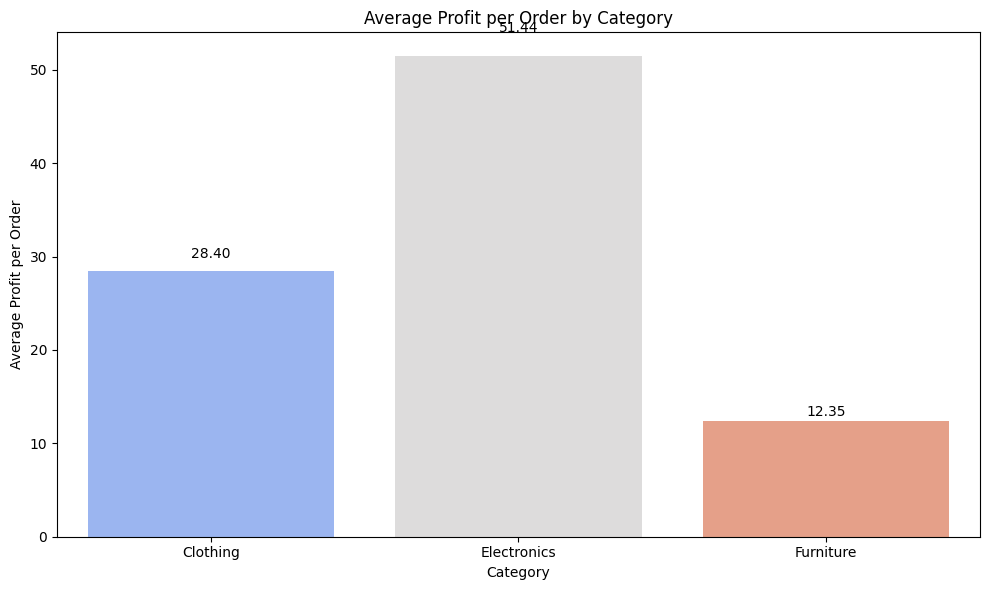

C:\Users\chinm\AppData\Local\Temp\ipykernel_12788\3109946060.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=category_stats, x='Category', y='profit_margin', palette='coolwarm')


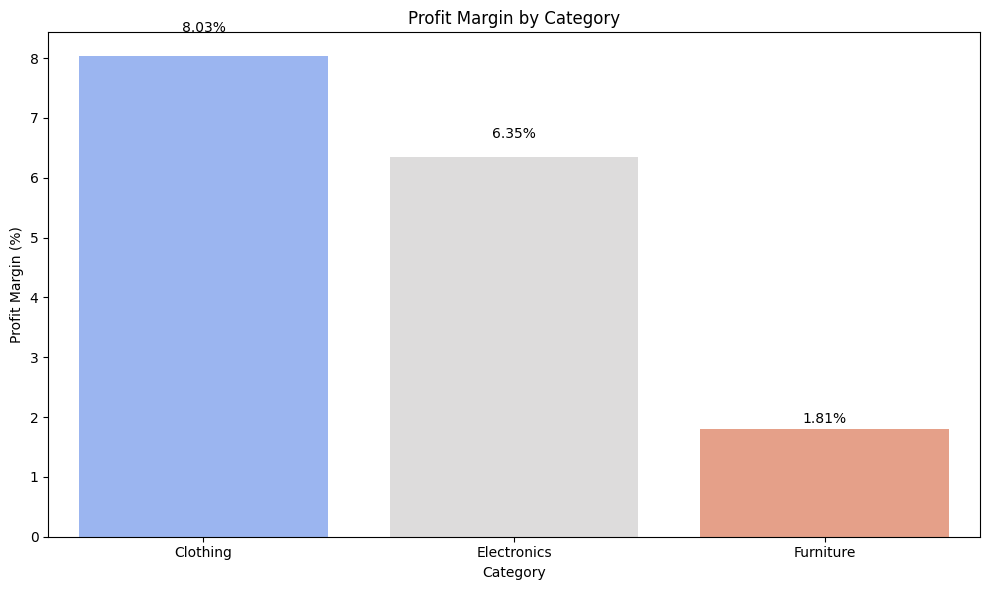

Based on Average Profit per Order:
Top-Performing Category: Electronics with an average profit per order of 51.44
Underperforming Category: Furniture with an average profit per order of 12.35

Based on Profit Margin:
Top-Performing Category: Clothing with a profit margin of 8.03 %
Underperforming Category: Furniture with a profit margin of 1.81 %


In [24]:
category_stats = merged_df.groupby('Category').agg(
    total_sales=('Amount', 'sum'),
    total_profit=('Profit', 'sum'),
    order_count=('Order ID', 'nunique')
).reset_index()

category_stats['avg_profit_per_order'] = category_stats['total_profit'] / category_stats['order_count']
category_stats['profit_margin'] = (category_stats['total_profit'] / category_stats['total_sales']) * 100

# Identify top-performing and underperforming categories (for annotation/reference)
top_avg_profit = category_stats.loc[category_stats['avg_profit_per_order'].idxmax()]
bottom_avg_profit = category_stats.loc[category_stats['avg_profit_per_order'].idxmin()]
top_profit_margin = category_stats.loc[category_stats['profit_margin'].idxmax()]
bottom_profit_margin = category_stats.loc[category_stats['profit_margin'].idxmin()]

# --- 3. Visualizations ---

# Plot 1: Average Profit per Order by Category
plt.figure(figsize=(10,6))
ax1 = sns.barplot(data=category_stats, x='Category', y='avg_profit_per_order', palette='coolwarm')
plt.title('Average Profit per Order by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit per Order')

# Annotate each bar with its value
for index, row in category_stats.iterrows():
    ax1.text(index, row['avg_profit_per_order'] + 0.05*row['avg_profit_per_order'], 
             f"{row['avg_profit_per_order']:.2f}", color='black', ha="center")

plt.tight_layout()
plt.show()

# Plot 2: Profit Margin by Category
plt.figure(figsize=(10,6))
ax2 = sns.barplot(data=category_stats, x='Category', y='profit_margin', palette='coolwarm')
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')

# Annotate each bar with its value
for index, row in category_stats.iterrows():
    ax2.text(index, row['profit_margin'] + 0.05*row['profit_margin'], 
             f"{row['profit_margin']:.2f}%", color='black', ha="center")

plt.tight_layout()
plt.show()

# --- 4. Print Summary of Top and Underperforming Categories ---
print("Based on Average Profit per Order:")
print("Top-Performing Category:", top_avg_profit['Category'], 
      "with an average profit per order of", round(top_avg_profit['avg_profit_per_order'], 2))
print("Underperforming Category:", bottom_avg_profit['Category'], 
      "with an average profit per order of", round(bottom_avg_profit['avg_profit_per_order'], 2))

print("\nBased on Profit Margin:")
print("Top-Performing Category:", top_profit_margin['Category'], 
      "with a profit margin of", round(top_profit_margin['profit_margin'], 2), "%")
print("Underperforming Category:", bottom_profit_margin['Category'], 
      "with a profit margin of", round(bottom_profit_margin['profit_margin'], 2), "%")

## Part 2: Target Achievement Analysis 

In [18]:
sales_target.head()

,Month of Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-05-01,Furniture,10500.0
2,2018-06-01,Furniture,10600.0
3,2018-07-01,Furniture,10800.0
4,2018-08-01,Furniture,10900.0


In [16]:

sales_target['Month of Order Date'] = pd.to_datetime(sales_target['Month of Order Date'], format="%b-%y")

In [19]:
sales_target.head()

,Month of Order Date,Category,Target
0,2018-04-01,Furniture,10400.0
1,2018-05-01,Furniture,10500.0
2,2018-06-01,Furniture,10600.0
3,2018-07-01,Furniture,10800.0
4,2018-08-01,Furniture,10900.0


   Month of Order Date   Target  Pct_Change
0           2018-04-01  10400.0         NaN
1           2018-05-01  10500.0    0.961538
2           2018-06-01  10600.0    0.952381
3           2018-07-01  10800.0    1.886792
4           2018-08-01  10900.0    0.925926
5           2018-09-01  11000.0    0.917431
6           2018-10-01  11100.0    0.909091
7           2018-11-01  11300.0    1.801802
8           2018-12-01  11400.0    0.884956
9           2019-01-01  11500.0    0.877193
10          2019-02-01  11600.0    0.869565
11          2019-03-01  11800.0    1.724138


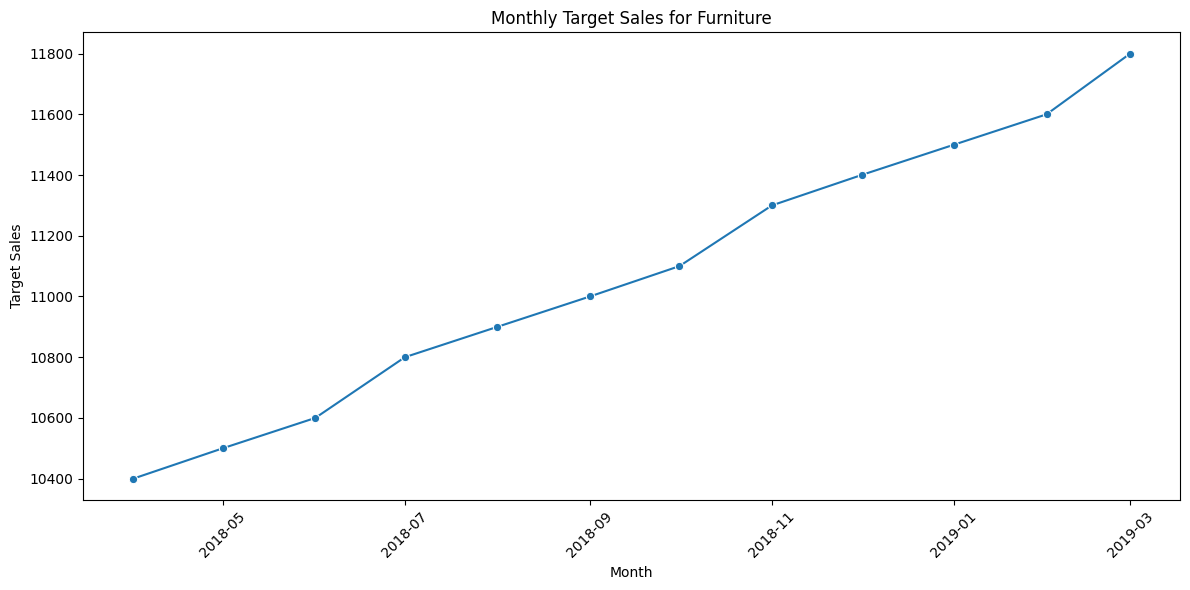

C:\Users\chinm\AppData\Local\Temp\ipykernel_12788\925373482.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=furniture_targets, x='Month of Order Date', y='Pct_Change', palette='viridis')


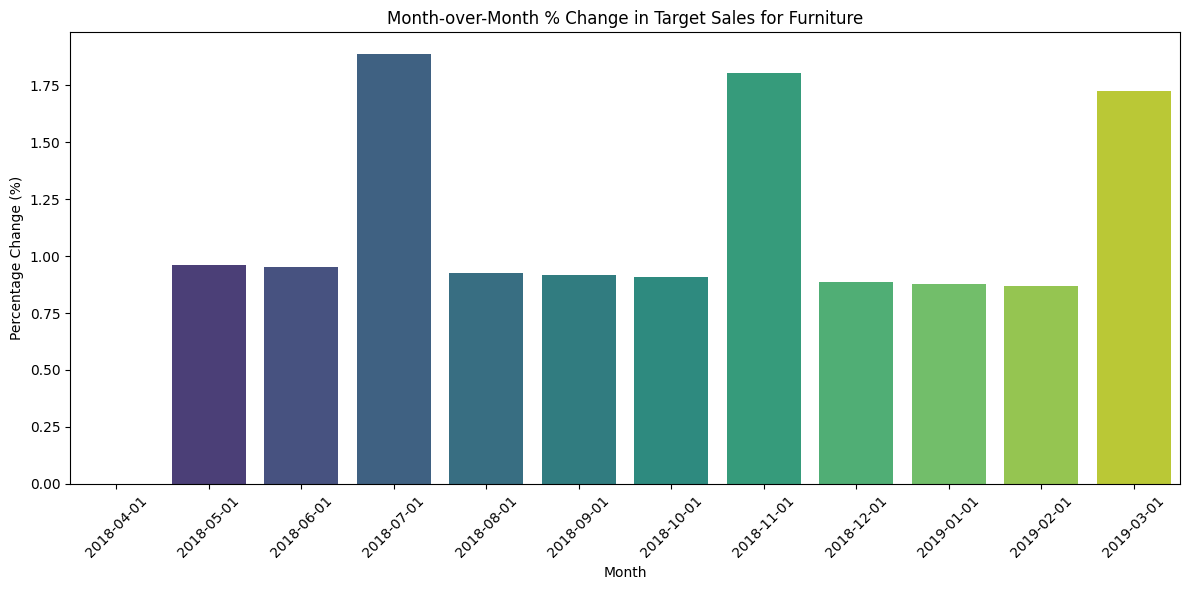

In [23]:

# Filter for the Furniture category
furniture_targets = sales_target[sales_target['Category'] == 'Furniture'].copy()

# Convert 'Month of Order Date' to datetime (assuming it's in "dd-mm-yyyy" format)
furniture_targets['Month of Order Date'] = pd.to_datetime(furniture_targets['Month of Order Date'], format="%d-%m-%Y")

# Sort the DataFrame by date
furniture_targets.sort_values('Month of Order Date', inplace=True)

# Calculate the month-over-month percentage change in target sales
furniture_targets['Pct_Change'] = furniture_targets['Target'].pct_change() * 100

# Display the updated DataFrame
print(furniture_targets[['Month of Order Date', 'Target', 'Pct_Change']])

# Plot 1: Monthly Target Sales for Furniture
plt.figure(figsize=(12,6))
sns.lineplot(data=furniture_targets, x='Month of Order Date', y='Target', marker='o')
plt.title('Monthly Target Sales for Furniture')
plt.xlabel('Month')
plt.ylabel('Target Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Month-over-Month Percentage Change in Target Sales
plt.figure(figsize=(12,6))
sns.barplot(data=furniture_targets, x='Month of Order Date', y='Pct_Change', palette='viridis')
plt.title('Month-over-Month % Change in Target Sales for Furniture')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Part 3: Regional Performance Insights

In [25]:

# Identify the top 5 states by order count using the orders dataset
top_states = orders['State'].value_counts().head(5).index.tolist()
print("Top 5 states with highest order count:", top_states)

# Merge the orders and order_details datasets on 'Order ID'
merged_df = pd.merge(orders, order_details, on='Order ID', how='inner')

# Filter the merged dataset to include only orders from the top 5 states
top_states_df = merged_df[merged_df['State'].isin(top_states)]

# Group by State to calculate total sales and average profit
state_metrics = top_states_df.groupby('State').agg(
    total_sales=('Amount', 'sum'),
    avg_profit=('Profit', 'mean')
).reset_index()

# Display the results
print("\nTotal Sales and Average Profit for Top 5 States:")
print(state_metrics)


Top 5 states with highest order count: ['Madhya Pradesh', 'Maharashtra', 'Rajasthan', 'Gujarat', 'Punjab']

Total Sales and Average Profit for Top 5 States:
            State  total_sales  avg_profit
0         Gujarat      21058.0    5.344828
1  Madhya Pradesh     105140.0   16.326471
2     Maharashtra      95348.0   21.296552
3          Punjab      16786.0  -10.150000
4       Rajasthan      21149.0   16.986486


Regional Metrics by State:
                State  order_count  total_sales  total_profit  \
0      Andhra Pradesh           15      13256.0        -496.0   
1               Bihar           16      12943.0        -321.0   
2               Delhi           22      22531.0        2987.0   
3                 Goa           14       6705.0         370.0   
4             Gujarat           27      21058.0         465.0   
5             Haryana           14       8863.0        1325.0   
6    Himachal Pradesh           14       8666.0         656.0   
7   Jammu and Kashmir           14      10829.0           8.0   
8           Karnataka           21      15058.0         645.0   
9             Kerala            16      13459.0        1871.0   
10     Madhya Pradesh          101     105140.0        5551.0   
11        Maharashtra           90      95348.0        6176.0   
12           Nagaland           15      11903.0         148.0   
13             Punjab           25      16786.0        -609.0  

C:\Users\chinm\AppData\Local\Temp\ipykernel_12788\3147200002.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_stats.sort_values('total_sales', ascending=False),


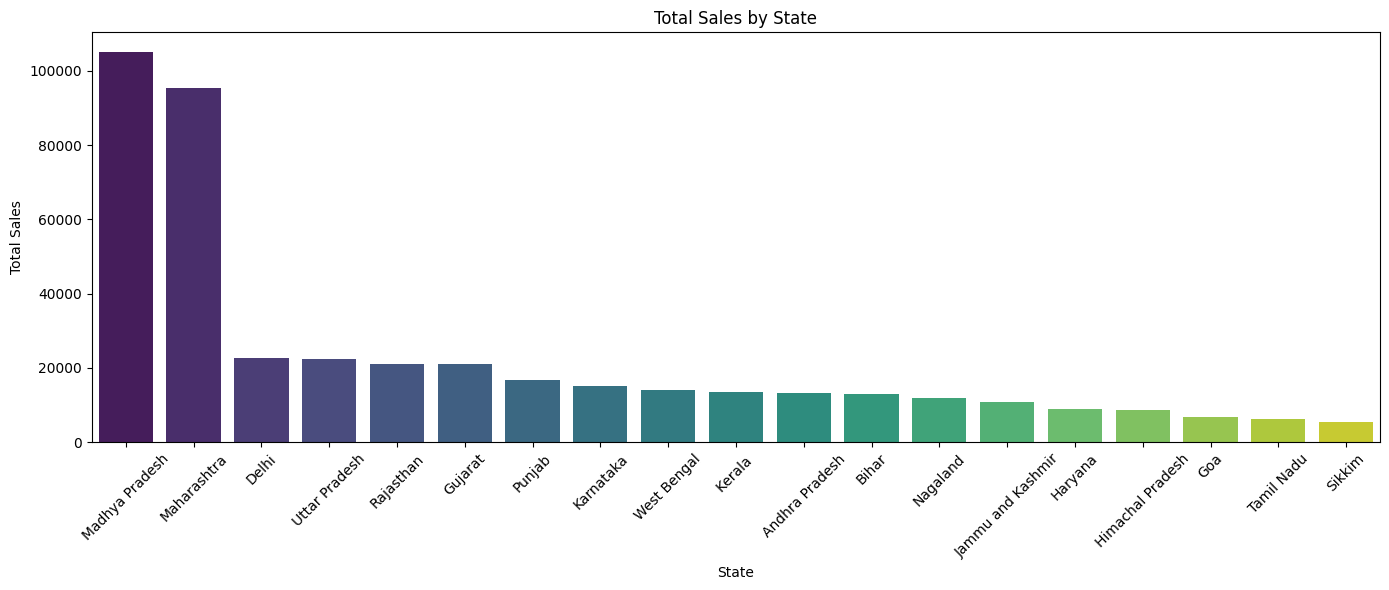

C:\Users\chinm\AppData\Local\Temp\ipykernel_12788\3147200002.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_stats.sort_values('avg_profit_per_order', ascending=False),


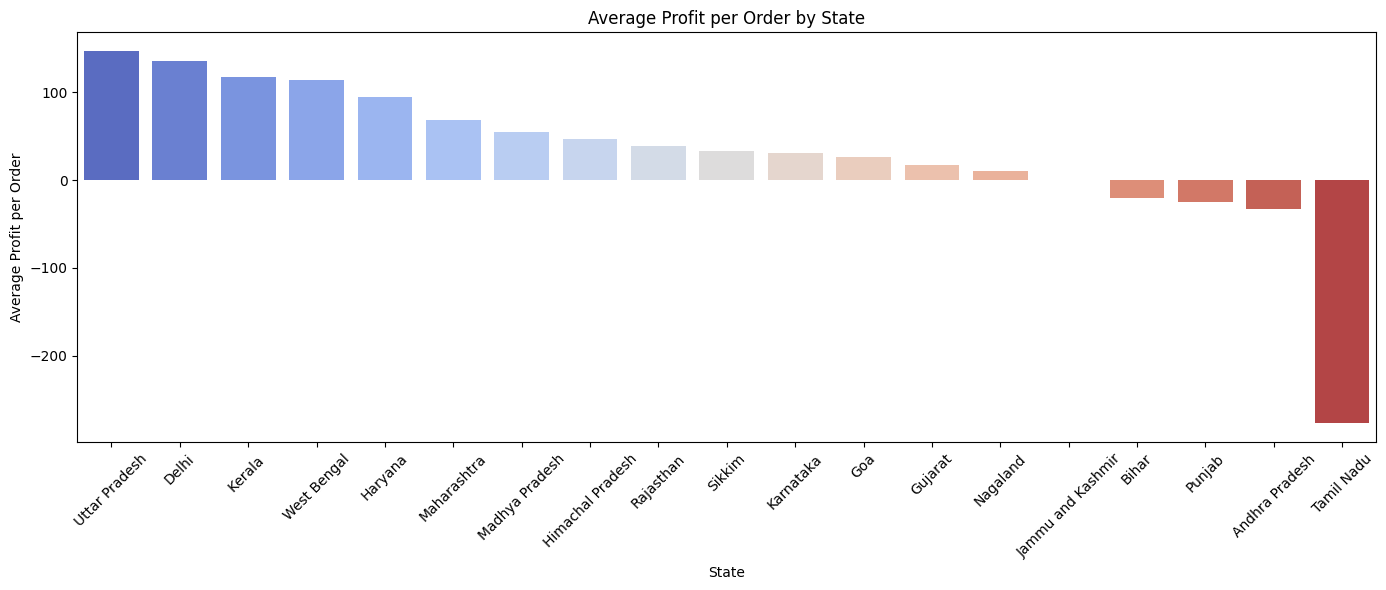

C:\Users\chinm\AppData\Local\Temp\ipykernel_12788\3147200002.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_stats.sort_values('profit_margin', ascending=False),


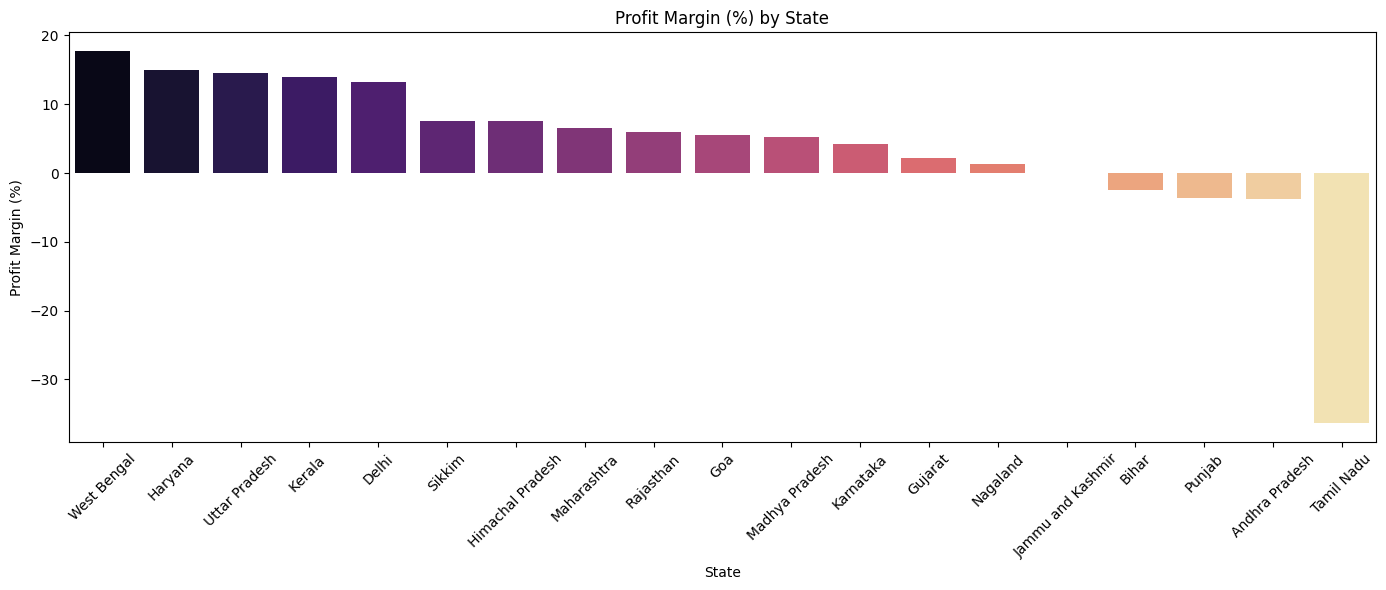

In [ ]:

state_stats = merged_df.groupby('State').agg(
    order_count=('Order ID', 'nunique'),
    total_sales=('Amount', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

# Calculate additional metrics:
state_stats['avg_profit_per_order'] = state_stats['total_profit'] / state_stats['order_count']
state_stats['profit_margin'] = (state_stats['total_profit'] / state_stats['total_sales']) * 100

# Print the computed metrics for review
print("Regional Metrics by State:")
print(state_stats)

# --- 3. Visualizations ---

# Plot 1: Total Sales by State
plt.figure(figsize=(14,6))
sns.barplot(data=state_stats.sort_values('total_sales', ascending=False), 
            x='State', y='total_sales', palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Average Profit per Order by State
plt.figure(figsize=(14,6))
sns.barplot(data=state_stats.sort_values('avg_profit_per_order', ascending=False), 
            x='State', y='avg_profit_per_order', palette='coolwarm')
plt.title('Average Profit per Order by State')
plt.xlabel('State')
plt.ylabel('Average Profit per Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Profit Margin (%) by State
plt.figure(figsize=(14,6))
sns.barplot(data=state_stats.sort_values('profit_margin', ascending=False), 
            x='State', y='profit_margin', palette='magma')
plt.title('Profit Margin (%) by State')
plt.xlabel('State')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
